## Task 4
### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# import warnings filter
import warnings
warnings.filterwarnings('ignore')   

In [2]:
# load the data into a dataframe and name the columns
df=pd.read_csv('twitter/twitter_training.csv', names=['id','country','label','text'] )

In [3]:
df.head(2)

,id,country,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...


In [4]:
df.tail(2)

,id,country,label,text
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
# check the shape
df.shape

(74682, 4)

In [6]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   country  74682 non-null  object
 2   label    74682 non-null  object
 3   text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
# check the label distribution
df['label'].value_counts()

label
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

<Axes: xlabel='label'>

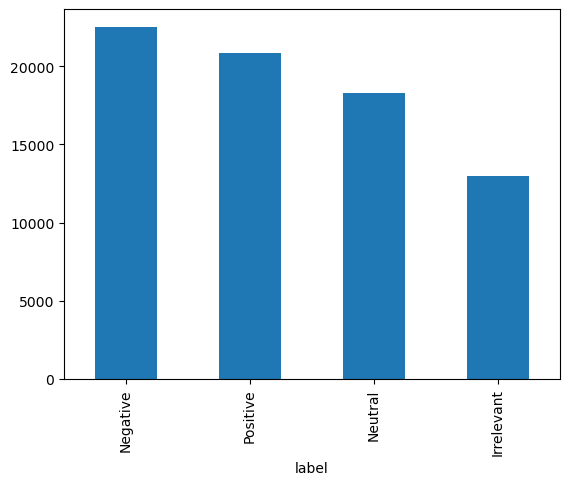

In [8]:
# visualize the label distribution
df['label'].value_counts().plot(kind='bar')

- checking how the sentiment labels are distributed, then plotting a bar chart to visualize it. This helps understand whether the dataset is balanced or biased towards one sentiment.

In [9]:
# print the random row of text with label
df.iloc[96]['text'], df.iloc[96]['label']


('Grounded almost looked pretty cool even despite the borderlands tier unfunny writing until it became yet another survival crafting game. I really can’t wait for this shitty trend to die',
 'Negative')

In [10]:
# check for null values
df.isnull().sum()

id           0
country      0
label        0
text       686
dtype: int64

In [11]:
# drop the null values
df.dropna(inplace=True)

## Preprocess
- we use a function to preprocess our data.


In [13]:
import spacy
nlp = spacy.load("en_core_web_sm") 
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [14]:
df['Preprocess text']=df['text'].apply(preprocess)

In [15]:
df.head()

,id,country,label,text,Preprocess text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder


In [16]:
# encode target column using LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,id,country,label,text,Preprocess text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder


In [17]:
#split data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(df['Preprocess text'],df['label'],test_size=0.2,random_state=0)

In [18]:
x_test.shape

(14800,)

In [19]:
x_train.shape

(59196,)

## Machine Learning Model


In [20]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))         
])

In [21]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [22]:
y_pred = clf.predict(x_test)

In [23]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7279729729729729


In [26]:
# classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

  Irrelevant       0.94      0.47      0.63      2541
    Negative       0.66      0.90      0.76      4445
     Neutral       0.82      0.63      0.71      3607
    Positive       0.71      0.79      0.75      4207

    accuracy                           0.73     14800
   macro avg       0.78      0.70      0.71     14800
weighted avg       0.76      0.73      0.72     14800



In [27]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))         
])

In [28]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', RandomForestClassifier())])

In [29]:
y_pred = clf.predict(x_test)

In [30]:
print(accuracy_score(y_test, y_pred))

0.9122297297297297


In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2541
           1       0.93      0.93      0.93      4445
           2       0.94      0.90      0.92      3607
           3       0.86      0.94      0.90      4207

    accuracy                           0.91     14800
   macro avg       0.92      0.91      0.91     14800
weighted avg       0.91      0.91      0.91     14800



In [32]:
test_data = pd.read_csv('twitter/twitter_validation.csv', names=['id','country','label','text'])

In [33]:
test_data.head()

,id,country,label,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [35]:
test_txt = test_data['text'][25]
print(f"{test_txt} ===> {test_data['label'][25]}")

#gtc20 -  nice, motivational, and very accessible Nvidia/AI product fair + related tech talks
nvidia.com/en-us/gtc/keyn…
interesting interaction/social activities: braindates, dinner with strangers, ...  and free attendance for universities: reg.rainfocus.com/flow/nvidia/gt… ===> Neutral


In [36]:
# Apply preprocess

test_txt_processed = [preprocess(test_txt)]
test_txt_processed

['gtc20   nice motivational accessible Nvidia AI product fair + related tech talk \n nvidia.com/en-us/gtc/keyn \n interesting interaction social activity braindate dinner stranger   free attendance university reg.rainfocus.com/flow/nvidia/gt']

In [37]:
# Get Prediction

test_txt = clf.predict(test_txt_processed)

In [39]:
classes = ['Irrelevant', 'Natural', 'Negative', 'Positive']

print(f"True Label: {test_data['label'][25]}")
print(f'Predict Label: {classes[test_txt[0]]}')


True Label: Neutral
Predict Label: Negative
